In [46]:
# 使用Tensorflow进行线性回归的求解
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets

In [47]:
sess = tf.Session()

In [48]:
iris = datasets.load_iris()

In [49]:
x_vals = np.array([[x[3] for x in iris.data]])
y_vals = np.array([[x[0] for x in iris.data]])

In [50]:
print(x_vals.shape)
print(y_vals.shape)

(1, 150)
(1, 150)


In [51]:
x_vals_column = np.transpose(x_vals)
y_vals_column = np.transpose(y_vals)

In [52]:
print(x_vals_column.shape)
print(y_vals_column.shape)

(150, 1)
(150, 1)


In [53]:
print(x_vals_column[:8, :])

[[0.2]
 [0.2]
 [0.2]
 [0.2]
 [0.2]
 [0.4]
 [0.3]
 [0.2]]


In [54]:
print(x_vals_column[:8].shape)

(8, 1)


In [55]:
learning_rate = 0.05
batch_size = 25

x_data = tf.placeholder(shape=[None, 1], dtype=tf.float32)
y_data = tf.placeholder(shape=[None, 1], dtype=tf.float32)
A = tf.Variable(tf.random_normal(shape=[1, 1]))
b = tf.Variable(tf.random_normal(shape=[1]))

In [56]:
print(A)
print(b)

<tf.Variable 'Variable_4:0' shape=(1, 1) dtype=float32_ref>
<tf.Variable 'Variable_5:0' shape=(1,) dtype=float32_ref>


In [57]:
model_out = tf.add(tf.matmul(x_data, A), b)

In [58]:
print(model_out)

Tensor("Add_2:0", shape=(?, 1), dtype=float32)


In [59]:
loss = tf.reduce_mean(tf.square(y_data - model_out))

In [60]:
print(loss)

Tensor("Mean_2:0", shape=(), dtype=float32)


In [61]:
opt = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(loss)

In [62]:
init = tf.global_variables_initializer()
sess.run(init)

In [63]:
loss_vec = []
for i in range(100):
    rand_index = np.random.choice(len(x_vals), batch_size)
    rand_x = x_vals_column[rand_index]
    rand_y = y_vals_column[rand_index]
    _, tmp_loss, A_, b_= sess.run([opt, loss, A, b], feed_dict={x_data: rand_x, y_data: rand_y})
    loss_vec.append(tmp_loss)
    if (i+1) % 25 == 0:
        print('Step # {0}: A={1}, b={2}'.format(i+1, A_, b_))
        print('loss=', tmp_loss)

Step # 25: A=[[0.42301857]], b=[4.622227]
loss= 0.19254951
Step # 50: A=[[0.49377206]], b=[4.9759936]
loss= 0.00079425366
Step # 75: A=[[0.4983164]], b=[4.9987154]
loss= 3.2746414e-06
Step # 100: A=[[0.4986081]], b=[5.000174]
loss= 1.3648105e-08


In [73]:
[[slope]] = sess.run(A)
[intercept] = sess.run(b)

In [74]:
print(slope)
print(intercept)

0.4986081
5.000174


In [83]:
best_fit = []
for i in x_vals_column:
    best_fit.append(slope * i + intercept)

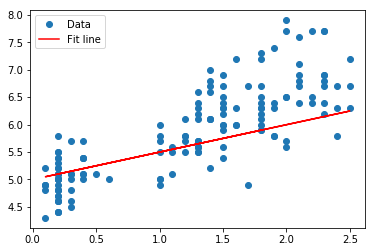

In [88]:
plt.plot(x_vals_column, y_vals_column, 'o', label='Data')
plt.plot(x_vals_column, best_fit, 'r-', label='Fit line')
plt.legend()
plt.show()

In [89]:
sess.close()

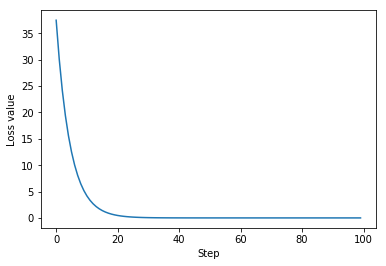

In [91]:
plt.plot(loss_vec)
plt.xlabel('Step')
plt.ylabel('Loss value')
plt.show()

In [92]:
# 使用l1损失损失进行计算

In [106]:
tf.reset_default_graph()
sess = tf.Session()

In [107]:
x_vals = np.array([[x[3] for x in iris.data]])
y_vals = np.array([[y[0] for y in iris.data]])

In [108]:
print(x_vals.shape)
print(y_vals.shape)

(1, 150)
(1, 150)


In [109]:
x_vals_column = np.transpose(x_vals)
y_vals_column = np.transpose(y_vals)

In [112]:
print(x_vals_column.shape)

(150, 1)


In [113]:
batch_size = 25
lr = 0.01
iterations = 100

A = tf.Variable(tf.random_normal(shape=[1, 1]))
b = tf.Variable(tf.random_normal(shape=[1]))
print(A)
print(b)

<tf.Variable 'Variable_2:0' shape=(1, 1) dtype=float32_ref>
<tf.Variable 'Variable_3:0' shape=(1,) dtype=float32_ref>


In [114]:
x_data = tf.placeholder(shape=[None, 1], dtype=tf.float32)
y_data = tf.placeholder(shape=[None, 1], dtype=tf.float32)

In [115]:
model_out = tf.add(tf.matmul(x_data, A), b)
print(model_out)

Tensor("Add:0", shape=(?, 1), dtype=float32)


In [116]:
loss = tf.reduce_mean(tf.abs(y_data - model_out))
print(loss)

Tensor("Mean:0", shape=(), dtype=float32)


In [117]:
opt = tf.train.GradientDescentOptimizer(lr).minimize(loss)
print(opt)

name: "GradientDescent"
op: "NoOp"
input: "^GradientDescent/update_Variable_2/ApplyGradientDescent"
input: "^GradientDescent/update_Variable_3/ApplyGradientDescent"



In [118]:
init = tf.global_variables_initializer()
sess.run(init)

In [119]:
loss_vec2 = []
for i in range(iterations):
    rand_index = np.random.choice(len(x_vals_column), batch_size)
    rand_x = x_vals_column[rand_index]
    rand_y = y_vals_column[rand_index]
    _, loss_, A_, b_ = sess.run([opt, loss, A, b], feed_dict={x_data: rand_x, y_data: rand_y})
    loss_vec2.append(loss_)
    if (i + 1) % 25 == 0:
        print('Step # {0}: A={1}, b={2}'.format(i+1, A_, b_))
        print('Loss=', loss_)

Step # 25: A=[[0.36626425]], b=[0.31105807]
Loss= 5.1556983
Step # 50: A=[[0.6666242]], b=[0.56105787]
Loss= 4.549519
Step # 75: A=[[0.97102416]], b=[0.8110576]
Loss= 3.8621027
Step # 100: A=[[1.2737843]], b=[1.0610574]
Loss= 3.2478013


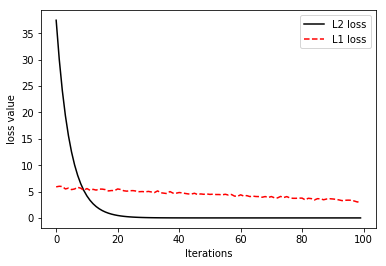

In [120]:
plt.plot(loss_vec, 'k-', label='L2 loss')
plt.plot(loss_vec2, 'r--', label='L1 loss')
plt.legend()
plt.xlabel('Iterations')
plt.ylabel('loss value')
plt.show()

In [122]:
sess.close()

In [121]:
# 岭回归

In [123]:
tf.reset_default_graph()

In [124]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets

In [125]:
sess = tf.Session()

In [126]:
iris = datasets.load_iris()

In [127]:
x_vals = np.array([[x[3] for x in iris.data]])
y_vals = np.array([[y[0] for y in iris.data]])

In [128]:
print(x_vals.shape)
print(y_vals.shape)

(1, 150)
(1, 150)


In [129]:
x_vals_column = np.transpose(x_vals)
y_vals_column = np.transpose(y_vals)

In [130]:
print(x_vals_column[:3])

[[0.2]
 [0.2]
 [0.2]]


In [131]:
print(y_vals_column[:3])

[[5.1]
 [4.9]
 [4.7]]


In [132]:
batch_size = 50
lr = 0.1
iterations = 250

x_data = tf.placeholder(shape=[None, 1], dtype=tf.float32)
y_data = tf.placeholder(shape=[None, 1], dtype=tf.float32)
A = tf.Variable(tf.random_normal(shape=[1, 1]))
b = tf.Variable(tf.random_normal(shape=[1, 1]))
model_out = tf.add(tf.matmul(x_data, A), b)

In [133]:
print(model_out)

Tensor("Add:0", shape=(?, 1), dtype=float32)


In [137]:
# 定义损失函数
deming_numerator = tf.abs(tf.subtract(y_data, tf.add(tf.matmul(x_data, A), b)))
deming_denominator = tf.sqrt(tf.add(tf.square(A), 1))
loss = tf.reduce_mean(tf.truediv(deming_numerator, deming_denominator))

In [138]:
opt = tf.train.GradientDescentOptimizer(lr).minimize(loss)
print(opt)

name: "GradientDescent"
op: "NoOp"
input: "^GradientDescent/update_Variable/ApplyGradientDescent"
input: "^GradientDescent/update_Variable_1/ApplyGradientDescent"



In [139]:
init = tf.global_variables_initializer()
sess.run(init)

In [140]:
loss_vec3 = []
for i in range(iterations):
    rand_index = np.random.choice(len(x_vals_column), batch_size)
    rand_x = x_vals_column[rand_index]
    rand_y = y_vals_column[rand_index]
    _, loss_, A_, b_ = sess.run([opt, loss, A, b], feed_dict={x_data: rand_x, y_data: rand_y})
    loss_vec3.append(loss_)
    if (i + 1) % 25 == 0:
        print('Step # {0}: A={1}, b={2}'.format(i+1, A_, b_))
        print('loss=', loss_)

Step # 25: A=[[3.0402195]], b=[[0.70481443]]
loss= 0.6794238
Step # 50: A=[[3.375026]], b=[[0.9856215]]
loss= 0.461687
Step # 75: A=[[3.474507]], b=[[1.1430961]]
loss= 0.40717912
Step # 100: A=[[3.4557545]], b=[[1.2169344]]
loss= 0.40649432
Step # 125: A=[[3.4284503]], b=[[1.2941208]]
loss= 0.47604284
Step # 150: A=[[3.3945274]], b=[[1.362654]]
loss= 0.43359634
Step # 175: A=[[3.3175142]], b=[[1.3981267]]
loss= 0.46745324
Step # 200: A=[[3.2756333]], b=[[1.4711288]]
loss= 0.3571404
Step # 225: A=[[3.231778]], b=[[1.5442514]]
loss= 0.4606045
Step # 250: A=[[3.1890213]], b=[[1.6189439]]
loss= 0.40237045


In [142]:
[[slope]] = sess.run(A)
[[intercept]] = sess.run(b)
print(slope)
print(intercept)

3.1890213
1.6189439


In [143]:
best_fit = []
for i in x_vals_column:
    best_fit.append(slope * i + intercept)

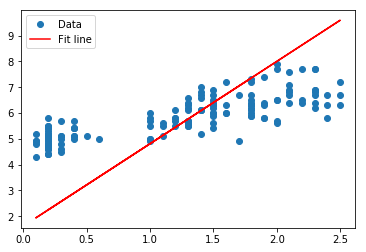

In [164]:
plt.plot(x_vals_column, y_vals_column, 'o', label='Data')
plt.plot(x_vals_column, best_fit, 'r-', label='Fit line')
plt.legend()
plt.show()

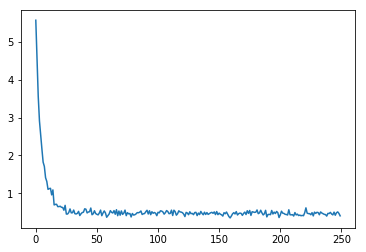

In [162]:
plt.plot(loss_vec3)
plt.show()

In [165]:
sess.close()

In [217]:
tf.reset_default_graph()
sess = tf.Session()

In [218]:
iris = datasets.load_iris() 
x_vals = np.array([[x[3] for x in iris.data]]) 
y_vals = np.array([[y[0] for y in iris.data]]) 
batch_size = 50 
learning_rate = 0.001 
x_data = tf.placeholder(shape=[None, 1], dtype=tf.float32) 
y_target = tf.placeholder(shape=[None, 1], dtype=tf.float32) 
A = tf.Variable(tf.random_normal(shape=[1,1])) 
b = tf.Variable(tf.random_normal(shape=[1,1])) 
model_output = tf.add(tf.matmul(x_data, A), b)

In [219]:
x_vals_column = np.transpose(x_vals)
y_vals_column = np.transpose(y_vals)

In [220]:
print(x_vals_column.shape)
print(y_vals_column.shape)

(150, 1)
(150, 1)


In [221]:
lasso_param = tf.constant(0.9) 
heavyside_step = tf.truediv(1., tf.add(1., tf.exp(tf.multiply(-100., tf.subtract(A, lasso_param))))) 
regularization_param = tf.multiply(heavyside_step, 99.) 
loss = tf.add(tf.reduce_mean(tf.square(y_target - model_output)), regularization_param)

In [222]:
init = tf.global_variables_initializer() 
sess.run(init) 
my_opt = tf.train.GradientDescentOptimizer(learning_rate) 
train_step = my_opt.minimize(loss)

In [223]:
loss_vec4 = [] 
for i in range(1500): 
    rand_index = np.random.choice(len(x_vals), size=batch_size) 
    rand_x = x_vals_column[rand_index]
    rand_y = y_vals_column[rand_index] 
    sess.run(train_step, feed_dict={x_data: rand_x, y_target: rand_y}) 
    temp_loss = sess.run(loss, feed_dict={x_data: rand_x, y_target: rand_y}) 
    loss_vec4.append(temp_loss[0]) 
    if (i+1)%300==0: 
        print('Step #' + str(i+1) + ' A = ' + str(sess.run(A)) + ' b = ' + str(sess.run(b))) 
        print('Loss = ' + str(temp_loss))

Step #300 A = [[0.79076856]] b = [[1.935511]]
Loss = [[9.039837]]
Step #600 A = [[0.80411994]] b = [[3.2915382]]
Loss = [[2.7214954]]
Step #900 A = [[0.7983446]] b = [[4.0357633]]
Loss = [[0.82205147]]
Step #1200 A = [[0.7927269]] b = [[4.444472]]
Loss = [[0.24916345]]
Step #1500 A = [[0.7873459]] b = [[4.669136]]
Loss = [[0.0760126]]


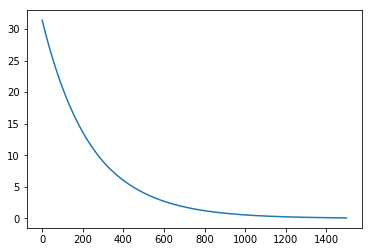

In [226]:
plt.plot(loss_vec4, label='lasso loss')
plt.show()

In [227]:
# 岭回归

In [228]:
tf.reset_default_graph()
sess = tf.Session()

In [229]:
iris = datasets.load_iris()

In [230]:
x_vals = np.array([[x[3] for x in iris.data]])
y_vals = np.array([[y[0] for y in iris.data]])
print(x_vals.shape)
print(y_vals.shape)

(1, 150)
(1, 150)


In [231]:
x_vals_column = np.transpose(x_vals)
y_vals_column = np.transpose(y_vals)
print(x_vals_column.shape)
print(y_vals_column.shape)

(150, 1)
(150, 1)


In [232]:
x_data = tf.placeholder(shape=[None, 1], dtype=tf.float32)
y_data = tf.placeholder(shape=[None, 1], dtype=tf.float32)

A = tf.Variable(tf.random_normal(shape=[1, 1]))
b = tf.Variable(tf.random_normal(shape=[1, 1]))
model_out = tf.add(tf.matmul(x_data, A), b)

In [233]:
batch_size = 50
lr = 0.001

In [234]:
lasso_param = tf.constant(1.)
lasso_loss = tf.reduce_mean(tf.abs(A))
loss = tf.add(tf.reduce_mean(tf.square(y_data - model_out)), tf.multiply(lasso_param, lasso_loss))

In [235]:
print(loss)

Tensor("Add_1:0", shape=(), dtype=float32)


In [236]:
loss = tf.expand_dims(loss, 0)

In [237]:
print(loss)

Tensor("ExpandDims:0", shape=(1,), dtype=float32)


In [238]:
opt = tf.train.GradientDescentOptimizer(lr).minimize(loss)

In [240]:
init = tf.global_variables_initializer()
sess.run(init)

In [241]:
loss_vec5 = []
for i in range(1000):
    rand_index = np.random.choice(len(x_vals_column), batch_size)
    rand_x = x_vals_column[rand_index]
    rand_y = y_vals_column[rand_index]
    _, loss_, A_, b_ = sess.run([opt, loss, A, b], feed_dict={x_data: rand_x, y_data: rand_y})
    loss_vec5.append(loss_)
    if (i + 1) % 250 == 0:
        print('Step # {0}: A={1}, b={2}'.format(i+1, A_, b_))
        print('Loss=', loss_)

Step # 250: A=[[2.197365]], b=[[0.7662017]]
Loss= [9.115616]
Step # 500: A=[[2.5205271]], b=[[1.6204653]]
Loss= [4.867153]
Step # 750: A=[[2.4091084]], b=[[2.1172602]]
Loss= [4.5344763]
Step # 1000: A=[[2.2039073]], b=[[2.5003963]]
Loss= [4.0056763]


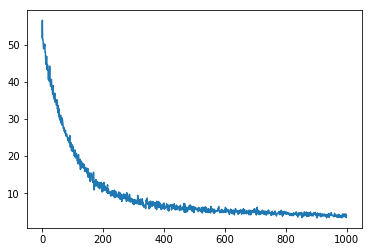

In [242]:
plt.plot(loss_vec5)
plt.show()

In [243]:
[[slope]] = sess.run(A)
[[intercept]] = sess.run(b)

In [254]:
best_fit = []
for i in x_vals_column:
    best_fit.append(slope * i + intercept)

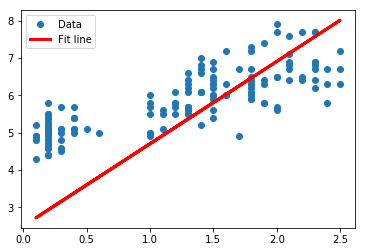

In [258]:
plt.plot(x_vals_column, y_vals_column, 'o', label='Data')
plt.plot(x_vals_column, best_fit, 'r-', label='Fit line', linewidth=3)
plt.legend()
plt.show()

In [259]:
sess.close()

In [260]:
tf.reset_default_graph()

In [261]:
sess = tf.Session()

In [262]:
x_data = tf.placeholder(shape=[None, 1], dtype=tf.float32)
y_data = tf.placeholder(shape=[None, 1], dtype=tf.float32)

A = tf.Variable(tf.random_normal(shape=[1, 1]))
b = tf.Variable(tf.random_normal(shape=[1, 1]))
model_out = tf.add(tf.matmul(x_data, A), b)

In [263]:
print(model_out)

Tensor("Add:0", shape=(?, 1), dtype=float32)


In [264]:
ridge_param = tf.constant(1.)
ridge_loss = tf.reduce_mean(tf.square(A))
loss = tf.add(tf.reduce_mean(tf.square(y_data - model_out)), tf.multiply(ridge_param, ridge_loss))

In [265]:
print(loss)

Tensor("Add_1:0", shape=(), dtype=float32)


In [266]:
opt = tf.train.GradientDescentOptimizer(0.001).minimize(loss)

In [268]:
init = tf.global_variables_initializer()
sess.run(init)

In [269]:
loss_vec6 = []
for i in range(1000):
    rand_index = np.random.choice(len(x_vals_column), 50)
    rand_x = x_vals_column[rand_index]
    rand_y = y_vals_column[rand_index]
    _, loss_, A_, b_ = sess.run([opt, loss, A, b], feed_dict={x_data: rand_x, y_data: rand_y})
    loss_vec6.append(loss_)
    if (i + 1) % 250 == 0:
        print('Step # {0}: A={1}, b={2}'.format(i+1, A_, b_))
        print('Loss=', loss_)

Step # 250: A=[[1.663347]], b=[[1.5995272]]
Loss= 9.532628
Step # 500: A=[[1.6396548]], b=[[2.470891]]
Loss= 5.1508627
Step # 750: A=[[1.418108]], b=[[3.0804267]]
Loss= 3.1744576
Step # 1000: A=[[1.2066435]], b=[[3.5522282]]
Loss= 2.5568316


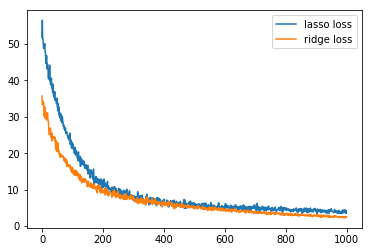

In [270]:
plt.plot(loss_vec5, label='lasso loss')
plt.plot(loss_vec6, label='ridge loss')
plt.legend()
plt.show()